# Terahertz conversion effeciency

Using a model that accounts for cascaded optical rectification, three-photon absorption of the near-infrared radiation, and material dispersion/absorption properties, we describe the Terahertz generation through optical rectification of near-infrared femtosecond pulses in DSTMS.

## Dispersion and absorption properties 

1. Using Lorentz model, we interpolate the refractive index of the nonlinear optical crystal (DSTMS) in the THz range. The oscillator parameters are based on the data extracted from "Montemezzani, G. et al. J. Opt. Soc. Am. B 32, 1078-1083 (2015)"
2. Using Sellmeier model, we interpolate the refractive index of the nonlinear crystal in the optical range. The parameters are based on the data extracted from "[]"
3. How do we determine the dispersion from the optical to terahertz region?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

from optical_rectification import definitions, par

# constants
c = 299792458.0  # speed of light [m/s]

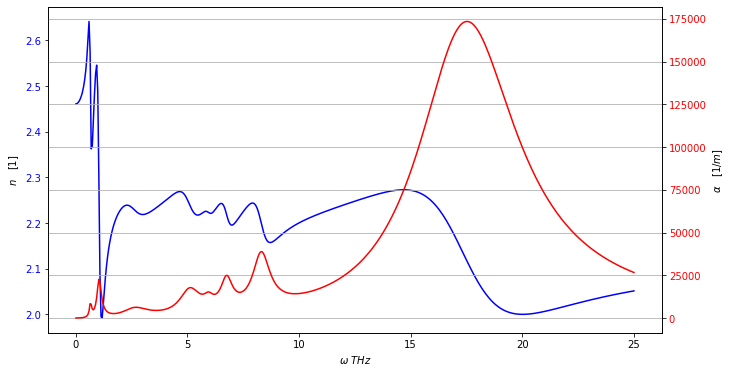

In [2]:
# Visualize refractive index in THz region
fig, ax1 = plt.subplots(figsize=(11, 6))

w = np.linspace(0.01, 25, 2**9)  # [THz]
index_thz = definitions.Index(w);
n_thz = index_thz.n()
alpha_thz = index_thz.alpha()

ax1.plot(w, n_thz, 'b')
ax1.set_xlabel(r'$\omega$ $THz$')
ax1.set_ylabel(r"$n \quad [1]$")
ax1.tick_params(axis='y',labelcolor='b')
ax2 = ax1.twinx()  # Create a second axes object that shares the same x-axis
ax2.plot(w, alpha_thz, 'r')
ax2.set_ylabel(r"$\alpha \quad [1/m]$")
ax2.tick_params(axis='y',labelcolor='r')
plt.grid(True)

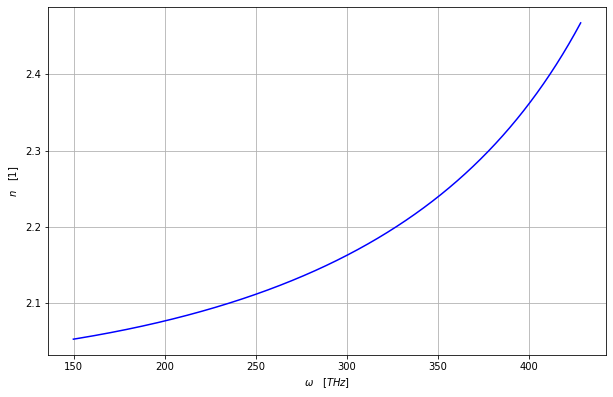

In [3]:
# Visualize refractive index in Optical region
fig, ax1 = plt.subplots(figsize=(10, 6.4))

# paramters in optical region
q = 1.45; n_inf = 2.026; # [1] 
lam0 = 532; # [nm]
# graph
lam = np.linspace(700, 2000, 2**14)  
index_opt = definitions.Index(lam);
n_opt = index_opt.sellmeier(n_inf, lam0, q);
ax1.plot(c/(lam*1e-9)*1e-12, n_opt, 'b')
ax1.set_xlabel(r'$\omega \quad [THz]$')
ax1.set_ylabel(r"$n \quad [1]$")
ax1.tick_params(axis='y',labelcolor='k')
plt.grid(True)